# **ANAVA UGM DATAVERS 2025**

## **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **READ THE DATASET**

In [2]:
train = pd.read_csv("/kaggle/input/penyisihan-data-vers-anava-19/train.csv")
train.head(5)

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status,Breakdown Category
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,1110.970519,NaN,106.145582,38.779147,262.330188,33.916720,NaN,ID12,A.4,...,2666.124927,2956.904780,4779.579998,3681.056129,19.624641,40.938353,NaN,Yes,Warning,NaN
1,TRXe9e6c37fc1281efd6c5ba52fce259584,608.487665,19.932166,375.386134,17.736401,45.051041,4.542451,-21.991755,ID37,K.3,...,2907.253211,2773.384487,4282.046671,4527.123292,28.167360,NaN,311.803841,Yes,Normal,NaN
2,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,ID24,J.1,...,3215.057495,3072.879720,4180.407796,4841.741619,29.843080,46.980726,1257.681079,No,Normal,NaN
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,710.093309,26.190643,294.871314,30.639358,140.984886,18.843502,-39.872275,ID7,J.4,...,4361.849341,3295.409873,3337.288244,3877.348905,28.720636,54.860603,478.325694,No,Breakdown,Unplanned Downtime
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,410.114364,9.664961,185.267516,28.154454,57.002150,23.915704,NaN,ID41,J.2,...,4817.893609,3084.624619,NaN,2501.387065,26.907301,NaN,674.159077,Yes,Breakdown,Unplanned Downtime


## **PREPROCESSING**

In [3]:
#check missing value
train.isnull().sum()

ID_Transaction                    0
temperature_10H_max (°C)     372665
temperature_10H_min (°C)    2488572
temperature-1                378878
temperature-2               1508600
temperature-3                468901
apparent_temperature_max    2775038
apparent_temperature_min    2621692
ID_Area                     2245196
Machine                     2184031
timestamp                         0
humidity                    2532064
Voltage-L                   1255754
Voltage-R                    897445
Voltage-M                    445621
Current-M                    141165
Current-R                    182444
Current-T                   2954720
RPM                         1440706
RPM-1                       1745236
RPM-2                       2438948
RPM-3                       2360433
Vibration-1                  696210
Vibration-2                 1973544
Power                       1702431
Power_Backup                 437397
Status                            0
Breakdown Category          

In [4]:
train['Status'].value_counts()

Status
Normal       7986989
Warning      2550024
Breakdown    2462987
Name: count, dtype: int64

In [5]:
train.shape

(13000000, 28)

In [6]:
## drop the columns that have missing value more than 60%

train = train.drop(columns =['Breakdown Category'])

In [7]:
train.head(5)

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,1110.970519,NaN,106.145582,38.779147,262.330188,33.916720,NaN,ID12,A.4,...,41.518015,2666.124927,2956.904780,4779.579998,3681.056129,19.624641,40.938353,NaN,Yes,Warning
1,TRXe9e6c37fc1281efd6c5ba52fce259584,608.487665,19.932166,375.386134,17.736401,45.051041,4.542451,-21.991755,ID37,K.3,...,61.479412,2907.253211,2773.384487,4282.046671,4527.123292,28.167360,NaN,311.803841,Yes,Normal
2,TRXcaef103041dfe1b84537bc3dbdbc6567,462.826917,3.185101,117.322749,22.256591,0.165788,8.695319,-31.803539,ID24,J.1,...,44.895073,3215.057495,3072.879720,4180.407796,4841.741619,29.843080,46.980726,1257.681079,No,Normal
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,710.093309,26.190643,294.871314,30.639358,140.984886,18.843502,-39.872275,ID7,J.4,...,NaN,4361.849341,3295.409873,3337.288244,3877.348905,28.720636,54.860603,478.325694,No,Breakdown
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,410.114364,9.664961,185.267516,28.154454,57.002150,23.915704,NaN,ID41,J.2,...,NaN,4817.893609,3084.624619,NaN,2501.387065,26.907301,NaN,674.159077,Yes,Breakdown


In [8]:
threshold = 50 / 100 * 13000000
print(threshold)

6500000.0


In [9]:
missing = train.isnull().sum()

over = missing[missing >=  6500000].index

In [10]:
print(over)

Index([], dtype='object')


In [11]:
numeric = train.select_dtypes(include =['number']).columns
categorical = train.select_dtypes(exclude =['number']).columns

In [12]:
train[numeric] = train[numeric].fillna(train[numeric].median())

In [13]:
for column in categorical:
    train[column]=train[column].fillna(train[column].mode()[0])

In [14]:
train.isnull().sum()

ID_Transaction              0
temperature_10H_max (°C)    0
temperature_10H_min (°C)    0
temperature-1               0
temperature-2               0
temperature-3               0
apparent_temperature_max    0
apparent_temperature_min    0
ID_Area                     0
Machine                     0
timestamp                   0
humidity                    0
Voltage-L                   0
Voltage-R                   0
Voltage-M                   0
Current-M                   0
Current-R                   0
Current-T                   0
RPM                         0
RPM-1                       0
RPM-2                       0
RPM-3                       0
Vibration-1                 0
Vibration-2                 0
Power                       0
Power_Backup                0
Status                      0
dtype: int64

In [15]:
train[numeric]=train[numeric].astype('float32')

In [16]:
train.dtypes

ID_Transaction               object
temperature_10H_max (°C)    float32
temperature_10H_min (°C)    float32
temperature-1               float32
temperature-2               float32
temperature-3               float32
apparent_temperature_max    float32
apparent_temperature_min    float32
ID_Area                      object
Machine                      object
timestamp                    object
humidity                    float32
Voltage-L                   float32
Voltage-R                   float32
Voltage-M                   float32
Current-M                   float32
Current-R                   float32
Current-T                   float32
RPM                         float32
RPM-1                       float32
RPM-2                       float32
RPM-3                       float32
Vibration-1                 float32
Vibration-2                 float32
Power                       float32
Power_Backup                 object
Status                       object
dtype: object

check duplicated data

In [17]:
train.duplicated().sum()

0

check outlier

In [18]:
n_cols = 3  # Jumlah kolom dalam grid
n_rows = int(np.ceil(len(numeric) / n_cols))  # Menghitung jumlah baris

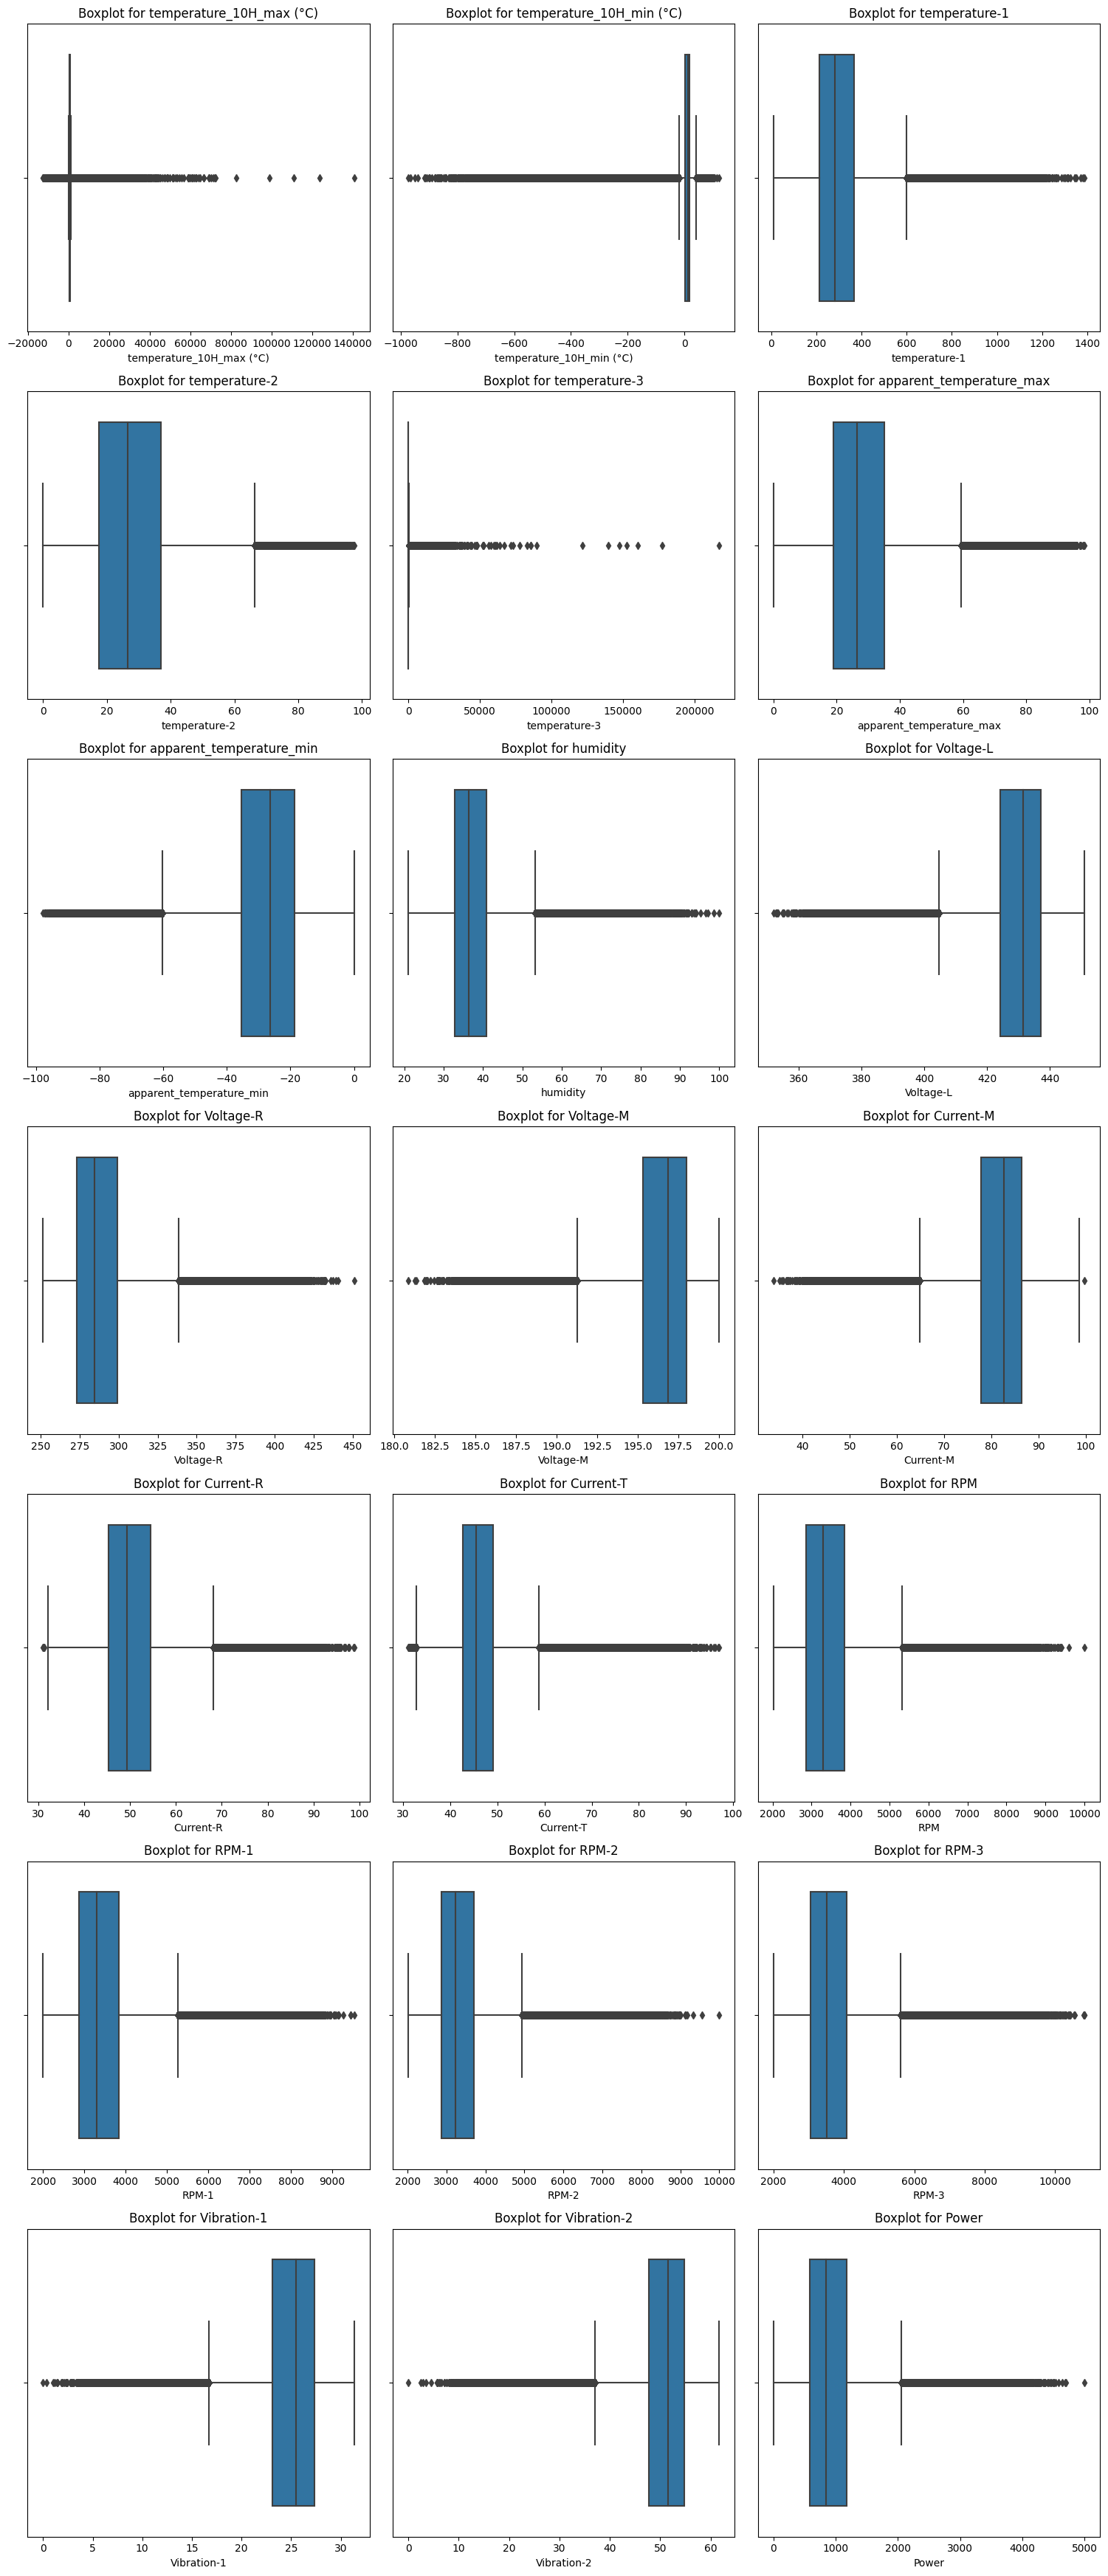

In [19]:
# Membuat ukuran figure agar cukup besar untuk menampilkan semua boxplot
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric, 1):
    plt.subplot(n_rows, n_cols, i)  # Menyesuaikan jumlah baris dan kolom
    sns.boxplot(data=train[numeric], x=col)
    plt.title(f'Boxplot for {col}')

# Menyesuaikan tata letak agar tidak overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

CLIPPING OUTLIERS

In [35]:
lower_bound = train[numeric].quantile(0.05)
upper_bound = train[numeric].quantile(0.95)

In [26]:
for column in numeric:
    train[column]=train[column].clip(lower=lower_col[column],upper=upper_col[col])

TRANSFORMATION

In [27]:
from sklearn.preprocessing import PowerTransformer

# Inisialisasi Yeo-Johnson Transformer
transformer = PowerTransformer(method='yeo-johnson')

In [34]:
median = train[numeric].median()
print(median)

temperature_10H_max (°C)     599.143616
temperature_10H_min (°C)      12.246912
temperature-1                283.463715
temperature-2                 26.447023
temperature-3                 79.861084
apparent_temperature_max      26.446856
apparent_temperature_min     -26.437433
humidity                      36.428738
Voltage-L                    431.437439
Voltage-R                    284.465210
Voltage-M                    196.857681
Current-M                     82.737343
Current-R                     49.273827
Current-T                     45.530064
RPM                         2451.148926
RPM-1                       2456.272681
RPM-2                       2434.500488
RPM-3                       2538.189406
Vibration-1                   25.507671
Vibration-2                   51.622448
Power                        840.854614
dtype: float64


In [37]:
for col in numeric:
    lower_bound = train[col].quantile(0.05)
    upper_bound = train[col].quantile(0.95)
    median = train[col].median()
    train.loc[(train[col] < lower_bound) | (train[col] > upper_bound), col] = median


In [28]:
# Terapkan Yeo-Johnson pada semua kolom numerik
train[numeric] = transformer.fit_transform(train[numeric])

# Cek hasilnya
train.head(5)

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.

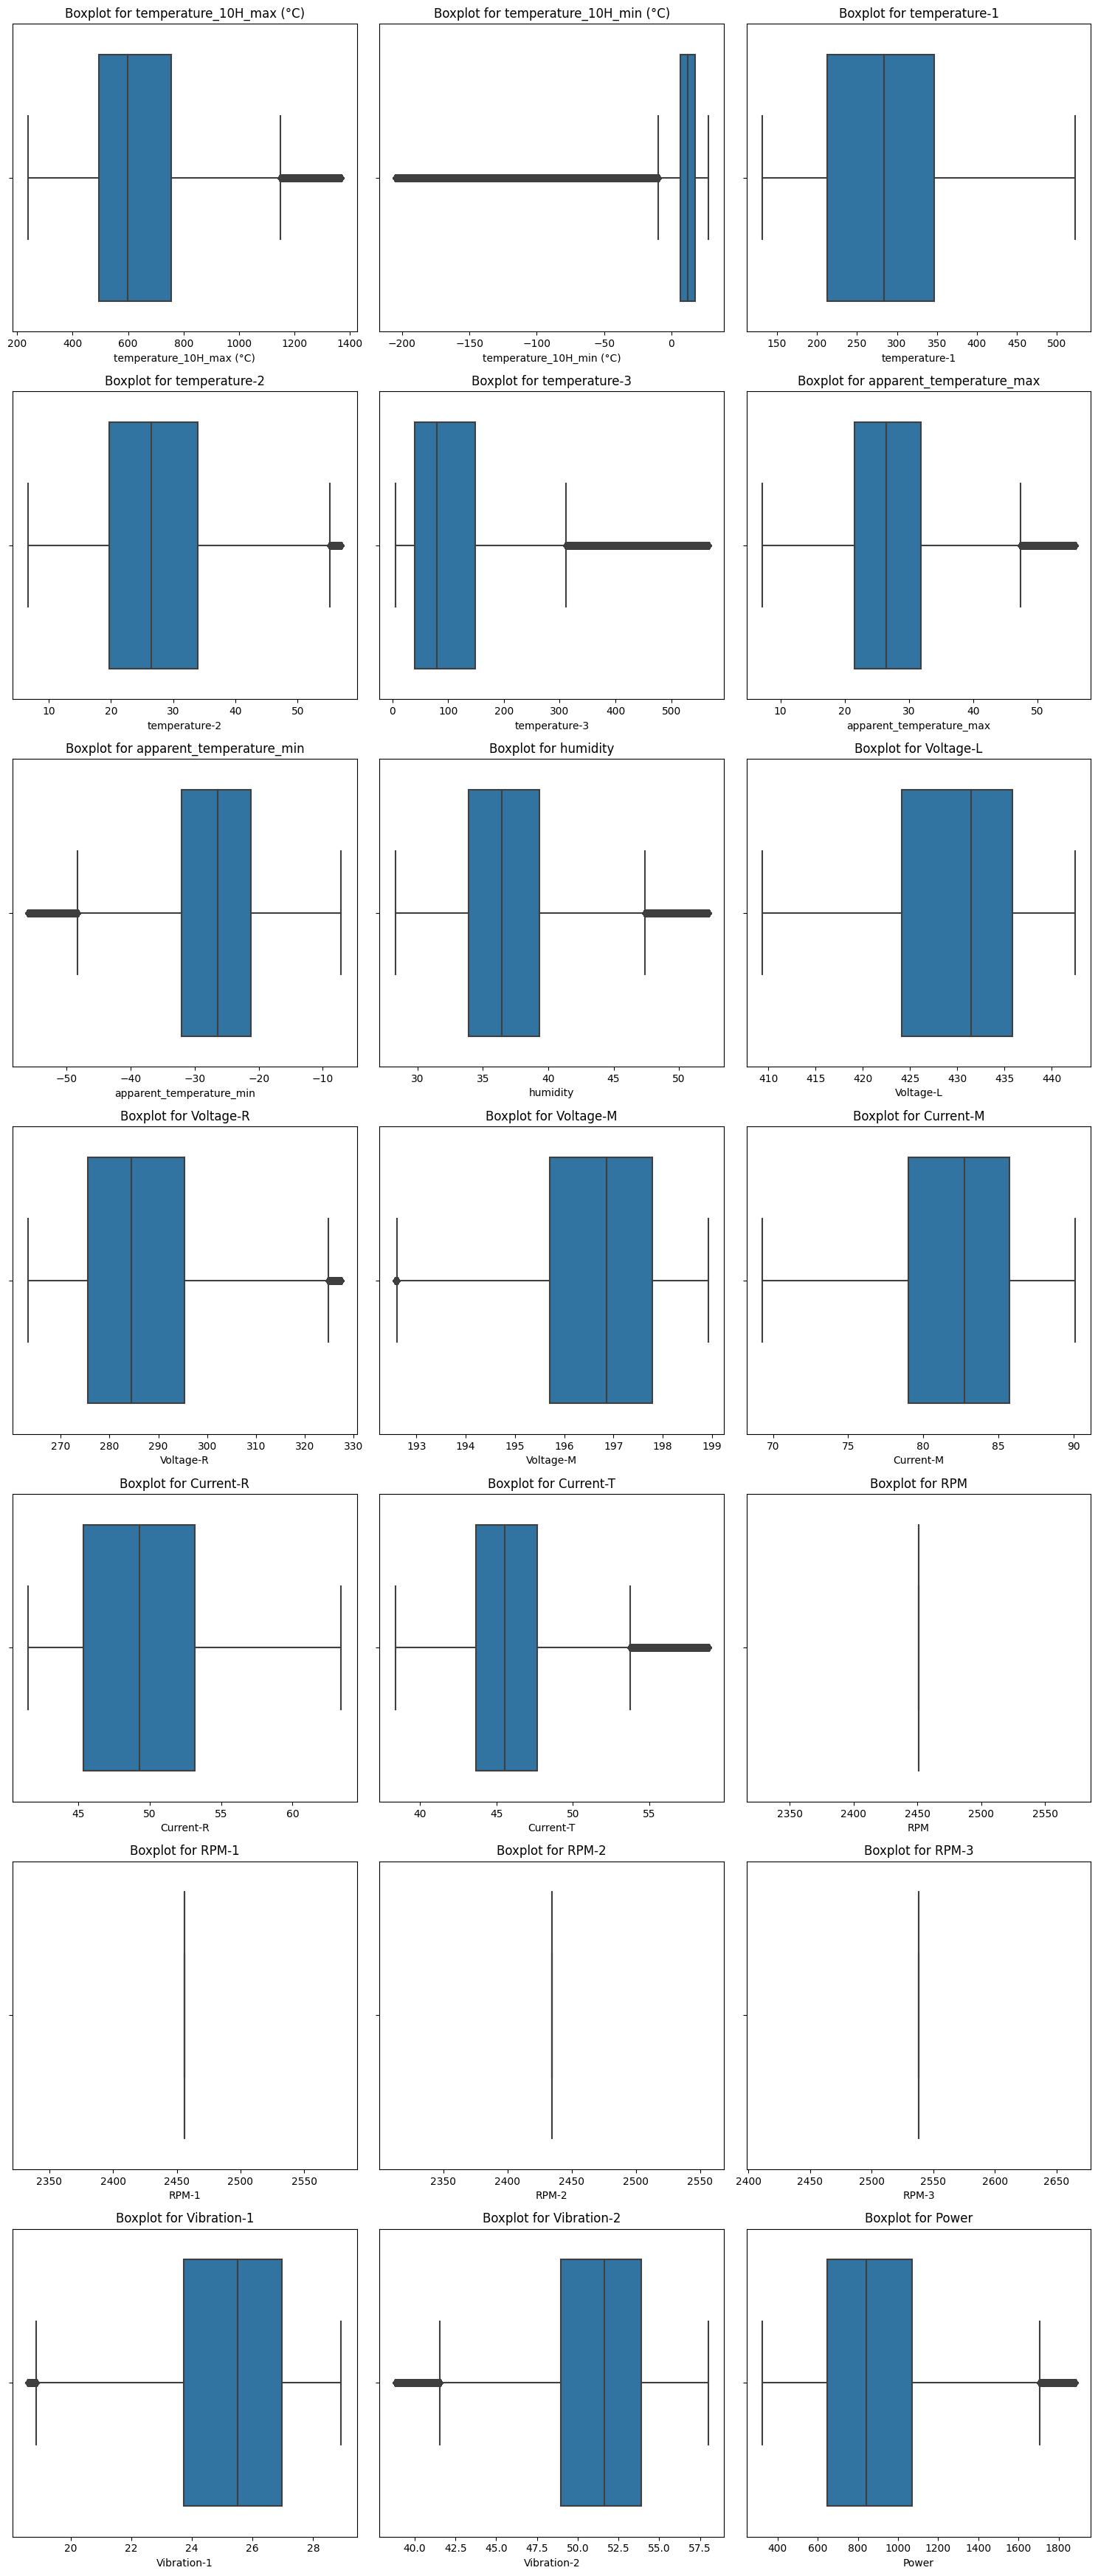

In [38]:
# Membuat ukuran figure agar cukup besar untuk menampilkan semua boxplot
plt.figure(figsize=(n_cols * 5, n_rows * 5))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric, 1):
    plt.subplot(n_rows, n_cols, i)  # Menyesuaikan jumlah baris dan kolom
    sns.boxplot(data=train[numeric], x=col)
    plt.title(f'Boxplot for {col}')

# Menyesuaikan tata letak agar tidak overlap
plt.tight_layout()

# Tampilkan plot
plt.show()

skalarisasi

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [40]:
train[numeric]=scaler.fit_transform(train[numeric])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram Sebelum Standardisasi')

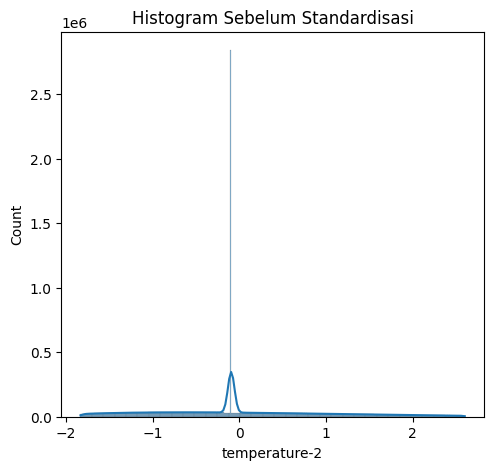

In [41]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

In [43]:
train.head(10)

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status
0,TRXc8f4c2dcbfe501093501015b32bd0ba2,2.105245,0.344735,-1.615641,0.993416,1.320153,0.634212,0.087327,ID12,A.4,...,-1.057152,0.0,-3.092282e-11,0.0,-5.047696e-11,-2.293673,-2.364602,-0.142112,Yes,Warning
1,TRXe9e6c37fc1281efd6c5ba52fce259584,-0.211066,0.511810,0.956609,-0.862496,-0.637813,-0.086072,0.511077,ID37,K.3,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,1.255910,0.139759,-0.142112,Yes,Normal
2,TRXcaef103041dfe1b84537bc3dbdbc6567,-0.882523,0.147734,-1.615641,-0.463828,-0.324130,-1.797769,-0.424154,ID24,J.1,...,-0.272946,0.0,-3.092282e-11,0.0,-5.047696e-11,0.150784,-0.948265,1.046412,No,Normal
3,TRX06f9e5574a639bcedb7ec8c3cb9fbaa4,0.257309,0.647868,0.106891,0.275509,0.226674,-0.819228,-1.193243,ID7,J.4,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,1.485802,0.898785,-1.175814,No,Breakdown
4,TRXd8f3a5ce90d25127ba3240a12eb9c140,-1.125514,0.288604,-1.049820,0.056347,-0.530118,-0.330139,0.087327,ID41,J.2,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,0.732344,0.139759,-0.617422,Yes,Breakdown
5,TRX6e688a1aa990ebade14e9553f3f6ab1b,-0.254140,-2.994855,-1.049401,-0.983057,-0.154093,-1.931971,0.557137,ID34,E.1,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,-1.004914,0.386227,-0.142112,Yes,Breakdown
6,TRX1efcc204f29eced3b86d456a1f885124,-0.254140,0.344735,-1.577132,-0.094243,-0.324130,-0.762287,0.087327,ID24,D.4,...,-0.903616,0.0,-3.092282e-11,0.0,-5.047696e-11,0.150784,1.017685,-0.626375,No,Normal
7,TRX4709cb800721f7e8d5dfa5b95b2423e6,-0.229773,0.454845,-0.200616,-0.407553,0.291852,-1.692614,1.739719,ID20,D.1,...,0.943718,0.0,-3.092282e-11,0.0,-5.047696e-11,1.033855,0.445894,0.005087,No,Normal
8,TRXa009ca713d701908fc978dae181d35c2,-1.086512,-0.604760,-0.013500,0.484602,-0.855449,1.060547,0.348718,ID4,C.4,...,-0.111653,0.0,-3.092282e-11,0.0,-5.047696e-11,0.921789,0.139759,-0.317852,Yes,Warning
9,TRX74dd63c9c2b3f0e775113dc888bbc556,-0.209029,0.344735,-1.193156,0.225176,-0.292993,-0.086072,-1.016447,ID36,I.2,...,-1.725017,0.0,-3.092282e-11,0.0,-5.047696e-11,0.150784,0.139759,-0.138781,No,Warning


ENCODING CATEGORICAL COLUMNS

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [46]:
for col in categorical:
    train[col]=encoder.fit_transform(train[col])

In [47]:
train.head(10)

,ID_Transaction,temperature_10H_max (°C),temperature_10H_min (°C),temperature-1,temperature-2,temperature-3,apparent_temperature_max,apparent_temperature_min,ID_Area,Machine,...,Current-T,RPM,RPM-1,RPM-2,RPM-3,Vibration-1,Vibration-2,Power,Power_Backup,Status
0,10205526,2.105245,0.344735,-1.615641,0.993416,1.320153,0.634212,0.087327,3,3,...,-1.057152,0.0,-3.092282e-11,0.0,-5.047696e-11,-2.293673,-2.364602,-0.142112,1,2
1,11878416,-0.211066,0.511810,0.956609,-0.862496,-0.637813,-0.086072,0.511077,30,42,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,1.255910,0.139759,-0.142112,1,1
2,10306088,-0.882523,0.147734,-1.615641,-0.463828,-0.324130,-1.797769,-0.424154,16,36,...,-0.272946,0.0,-3.092282e-11,0.0,-5.047696e-11,0.150784,-0.948265,1.046412,0,1
3,354293,0.257309,0.647868,0.106891,0.275509,0.226674,-0.819228,-1.193243,39,39,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,1.485802,0.898785,-1.175814,0,0
4,11016609,-1.125514,0.288604,-1.049820,0.056347,-0.530118,-0.330139,0.087327,35,37,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,0.732344,0.139759,-0.617422,1,0
5,5605944,-0.254140,-2.994855,-1.049401,-0.983057,-0.154093,-1.931971,0.557137,27,16,...,-0.125492,0.0,-3.092282e-11,0.0,-5.047696e-11,-1.004914,0.386227,-0.142112,1,0
6,1574399,-0.254140,0.344735,-1.577132,-0.094243,-0.324130,-0.762287,0.087327,16,15,...,-0.903616,0.0,-3.092282e-11,0.0,-5.047696e-11,0.150784,1.017685,-0.626375,0,1
7,3605391,-0.229773,0.454845,-0.200616,-0.407553,0.291852,-1.692614,1.739719,12,12,...,0.943718,0.0,-3.092282e-11,0.0,-5.047696e-11,1.033855,0.445894,0.005087,0,1
8,8127318,-1.086512,-0.604760,-0.013500,0.484602,-0.855449,1.060547,0.348718,33,11,...,-0.111653,0.0,-3.092282e-11,0.0,-5.047696e-11,0.921789,0.139759,-0.317852,1,2
9,5933753,-0.209029,0.344735,-1.193156,0.225176,-0.292993,-0.086072,-1.016447,29,33,...,-1.725017,0.0,-3.092282e-11,0.0,-5.047696e-11,0.150784,0.139759,-0.138781,0,2


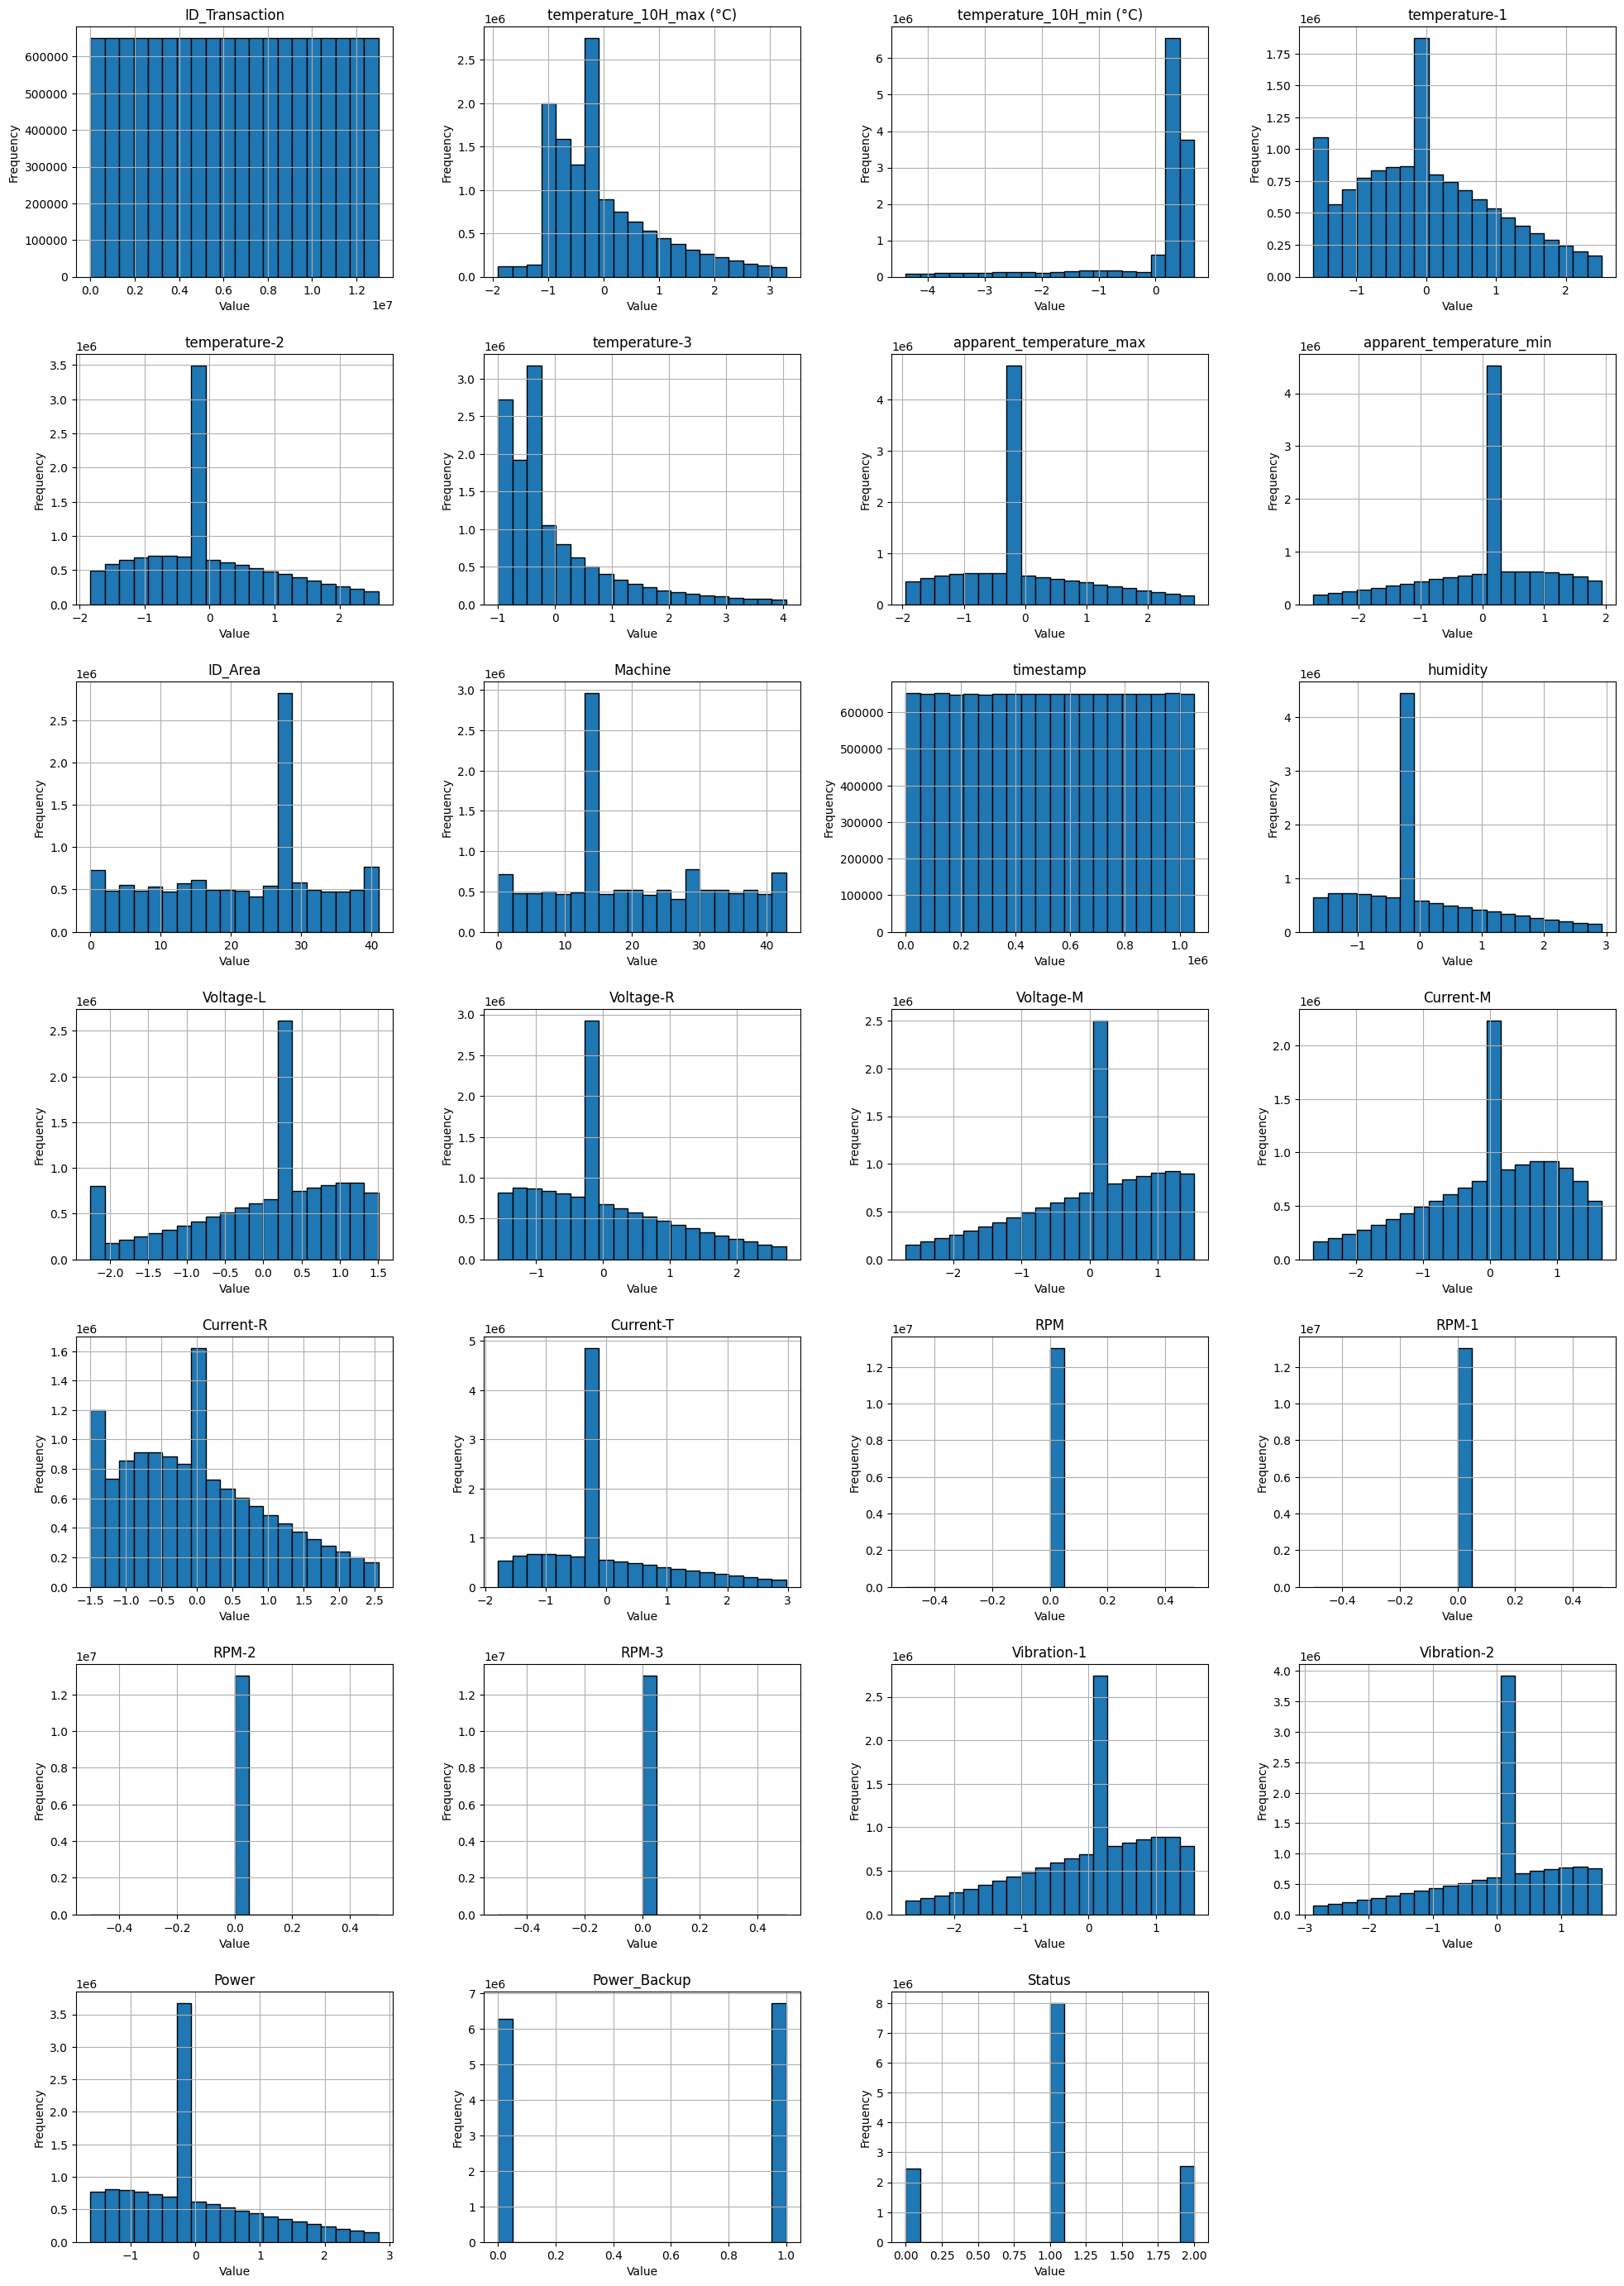

In [48]:
# Menghitung jumlah variabel
num_vars = train.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(train.columns):
    train[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(len(train.columns), len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout(pad=2.0)
plt.show()

In [53]:
train.shape

(13000000, 27)

## **BUILD THE MODEL**

In [50]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train.drop(columns=['Status'])  # Features
y = train['Status']                  # Target variable

# Split the data into training and testing sets
# Ensure you are passing both X and y to train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [52]:
logistic_model = LogisticRegression(max_iter=2000,random_state=42)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [54]:
y_pred_logistic = logistic_model.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.61
Confusion Matrix:
[[      0  492555       0]
 [      0 1597551       0]
 [      0  509894       0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    492555
           1       0.61      1.00      0.76   1597551
           2       0.00      0.00      0.00    509894

    accuracy                           0.61   2600000
   macro avg       0.20      0.33      0.25   2600000
weighted avg       0.38      0.61      0.47   2600000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


xgboost

In [55]:
import xgboost as xgb

# Membuat model XGBoost
model = xgb.XGBClassifier(
    n_estimators=200,  # Number of trees
    learning_rate=0.2, # Step size shrinkage
    max_depth=10,       # Maximum depth of a tree
    random_state=42    # Random seed
)

In [56]:
# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [57]:
# Memprediksi hasil dari data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}%")


Akurasi: 61.44%


Fully Connected Neural Networks (DEEP LEARNING)

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [68]:
from tensorflow.keras.utils import to_categorical

# Assume `y` contains raw integer labels (e.g., [0, 1, 2])
num_classes = 3  # Replace with the actual number of classes
y_train = to_categorical(y_train, num_classes)  # Convert to one-hot encoding
y_test = to_categorical(y_test, num_classes)


In [61]:
num_classes = len(np.unique(y))  # Number of classes

model_FCNN = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

In [72]:
model_FCNN.compile(
    optimizer='adam',  # Adaptive optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

In [70]:
dense_layer = tf.keras.layers.Dense(10)  # Instantiate the layer outside

@tf.function
def forward_pass(x):
    return dense_layer(x)


In [78]:
print(X_train.shape)


(10400000, 26)


In [73]:
history = model_FCNN.fit(
    X_train, y_train,
    validation_split=0.2,  # Use part of training data for validation
    epochs=20,  # Number of training iterations
    batch_size=32,  # Number of samples per gradient update
    verbose=1  # Show progress
)

Epoch 1/20


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 3), output.shape=(32, 3)

In [90]:
# Example setup
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dummy data
import numpy as np
num_classes = 3
batch_size = 64

# Input data
X = np.random.rand(batch_size * 5, 10)  # 160 samples, 10 features
y = np.random.randint(0, num_classes, size=(batch_size * 5,))  # Integer labels for 160 samples

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definition
model_fcnn = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Input shape matches the number of features
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # Output shape matches the number of classes
])

# Compile the model
model_fcnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_fcnn.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=1)

# Evaluate the model
loss, accuracy = model_fcnn.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4000 - loss: 1.1033
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3422 - loss: 1.1148 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3615 - loss: 1.0976 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3630 - loss: 1.0846 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3812 - loss: 1.0804 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3958 - loss: 1.0863 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4005 - loss: 1.0756 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3594 - loss: 1.0825 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3380 - loss: 1.0803 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3849 - loss: 1.0753 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3677 - loss: 1.0755 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3630 - loss: 1.0735 
Ep

ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32, 3), output.shape=(32, 3)

## **PREDICTION**